A)


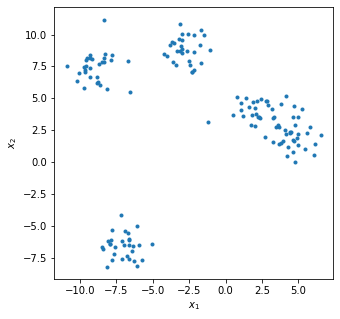

B) Após inspecionar a figura, eu acho que devem ser utilizados 4 clusters com algoritmo do k-Means.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=150, n_features=2, centers=5, cluster_std=1.0, shuffle=True,
random_state=42)

print('A)')
fig = plt.figure(figsize=(5,5))
plt.plot(x[:,0],x[:,1], '.')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

print('B) Após inspecionar a figura, eu acho que devem ser utilizados 4 clusters com algoritmo do k-Means.')

In [19]:
print('C)')

km = KMeans(n_clusters=4, init='k-means++', verbose=1)
km.fit_predict(x)
print('\nD)')
for i in range(0,4):
    print('Centroid %d: (%1.2f, %1.2f)' % (i,km.cluster_centers_[i][0],km.cluster_centers_[i][1]))

C)
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 416.0016641069224
start iteration
done sorting
end inner loop
Iteration 1, inertia 416.0016641069224
center shift 0.000000e+00 within tolerance 2.915599e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 416.0016641069224
start iteration
done sorting
end inner loop
Iteration 1, inertia 416.0016641069224
center shift 0.000000e+00 within tolerance 2.915599e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 416.0016641069224
start iteration
done sorting
end inner loop
Iteration 1, inertia 416.0016641069224
center shift 0.000000e+00 within tolerance 2.915599e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 426.3186952945109
start iteration
done sorting
end inner loop
Iteration 1, inertia 416.0016641069224
start iteration
done sorting
end inner loop
Iteration 2, inertia 416.

In [20]:
print('E) Foram necessárias', 25, 'iterações para se treinar o modelo. Pode-se conferir na saída do verbose.')

E) Foram necessárias 25 iterações para se treinar o modelo. Pode-se conferir na saída do verbose.


F)


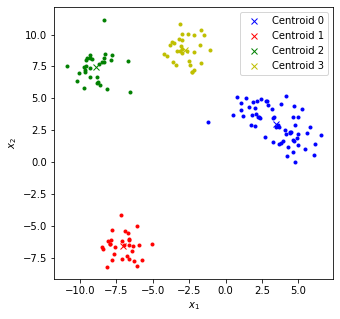

In [21]:
c = np.array([[3.45, 2.99],[-7.02, -6.59],[-8.90, 7.43],[-2.76, 8.82]])

matrix_new = np.zeros((x.shape[0],c.shape[0]))
for i in range(c.shape[0]):
    for k in range(x.shape[0]):
        dist = 0
        for l in range(x.shape[1]):
            dist = dist + (x[k,l] - c[i,l])**2
        matrix_new[k,i] = np.sqrt(dist)

#recalculate the centroids
index = np.zeros((x.shape[0],1))
for i in range(x.shape[0]):
    q = np.argmin(matrix_new[i,:])
    index[i,0] = q

print('F)')
idx0 = np.argwhere(index == 0)
idx1 = np.argwhere(index == 1)
idx2 = np.argwhere(index == 2)
idx3 = np.argwhere(index == 3)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0[:,0],0], x[idx0[:,0],1], 'b.')
plt.plot(x[idx1[:,0],0], x[idx1[:,0],1], 'r.')
plt.plot(x[idx2[:,0],0], x[idx2[:,0],1], 'g.')
plt.plot(x[idx3[:,0],0], x[idx3[:,0],1], 'y.')
plt.plot(c[0,0],c[0,1], 'bx', label='Centroid 0')
plt.plot(c[1,0],c[1,1], 'rx', label='Centroid 1')
plt.plot(c[2,0],c[2,1], 'gx', label='Centroid 2')
plt.plot(c[3,0],c[3,1], 'yx', label='Centroid 3')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('distribution_of_centroid', dpi=600)
plt.show()